In [1]:
keeps = ['name', 'colorIdentity', 'colors', 'type', 'types', 'subtypes', 'supertypes', 'cmc', 'power', 'toughness', 'flavor', 'text', 'legalities']
colorIdentity_map = {'B': 'Black', 'G': 'Green', 'R': 'Red', 'U': 'Blue', 'W': 'White'}
plt_colors = ['k', 'b', '0.5', 'g', 'r', 'w', 'm']

In [8]:
import plotly

In [2]:
import pandas as pd
import numpy as np
from numpy.random import random
from math import ceil

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem.porter import PorterStemmer
from nltk import RegexpTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
raw = pd.read_json('MagicDatasets/AllSets-x.json')
raw.columns()

TypeError: 'Index' object is not callable

In [17]:
column_str = str(raw.columns)

In [4]:
mtg = []
for col in raw.columns.values:
    release = pd.DataFrame(raw[col]['cards'])
    release = release.loc[:, keeps]
    release['releaseName'] = raw[col]['name']
    release['releaseDate'] = raw[col]['releaseDate']
    mtg.append(release)
mtg = pd.concat(mtg)
del release, raw   
mtg.shape

(31705, 15)

In [5]:
# remove promo cards that aren't used in normal play
# Edit 2016-09-30: Could be null because it's too new to have a ruling on it.
mtg_nulls = mtg.loc[mtg.legalities.isnull()]
mtg = mtg.loc[~mtg.legalities.isnull()]

# remove tokens without types
mtg = mtg.loc[~mtg.types.apply(lambda x: isinstance(x, float))]

# Power and toughness that depends on board state or mana cannot be resolved
mtg[['power', 'toughness']] = mtg[['power', 'toughness']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Fill
mtg.flavor.fillna('', inplace=True)
mtg.text.fillna('', inplace=True)
mtg.shape

(31089, 15)

In [6]:
# Combine colorIdentity and colors
mtg.loc[(mtg.colors.isnull()) & (mtg.colorIdentity.notnull()), 'colors'] = mtg.loc[(mtg.colors.isnull()) & (mtg.colorIdentity.notnull()), 'colorIdentity'].apply(lambda x: [colorIdentity_map[i] for i in x])
mtg['colorsCount'] = 0
mtg.loc[mtg.colors.notnull(), 'colorsCount'] = mtg.colors[mtg.colors.notnull()].apply(len)
mtg.loc[mtg.colors.isnull(), 'colors'] = ['Colorless']
mtg['colorsStr'] = mtg.colors.apply(lambda x: ''.join(x))

# Include colorless and multi-color.
mtg['manaColors'] = mtg['colorsStr']
mtg.loc[mtg.colorsCount>1, 'manaColors'] = 'Multi'

# Materialize color columns
mono_colors = np.sort(mtg.colorsStr[mtg.colorsCount<=1].unique()).tolist()

for color in mono_colors:
    mtg[color] = mtg.colors.apply(lambda x: color in x)

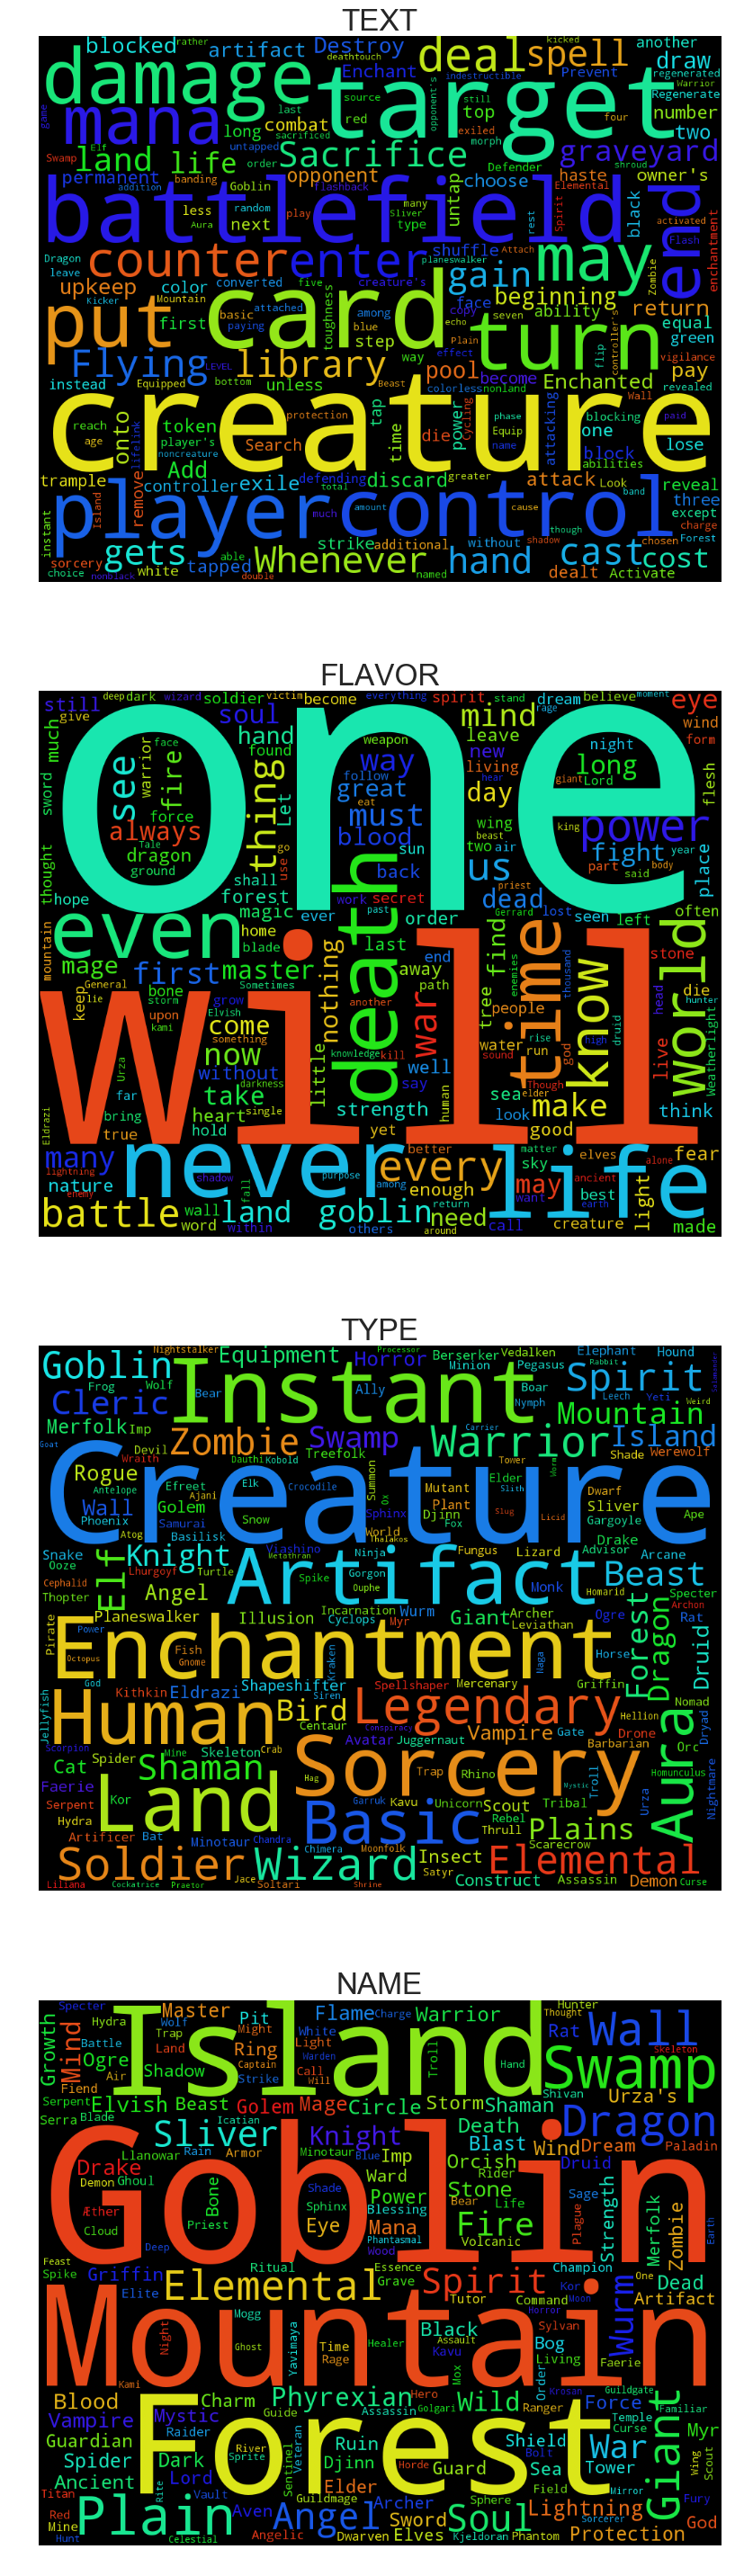

In [11]:
wc = WordCloud(width=1000, height=800, max_words=200, relative_scaling=0.5)
cols = ['text', 'flavor', 'type', 'name']
f, axs = plt.subplots(len(cols), figsize=(80, 36))

for i, col in enumerate(cols):
    text = mtg[col].str.cat(sep=' ')    
    wc.generate(text)
    axs[i].imshow(wc)
    axs[i].axis("off")    
    axs[i].set_title(col.upper(), fontsize=24)

del wc, cols, f, axs

In [8]:
setcode = "kaladesh"
card_name = "saheeli rai"

In [9]:
card_name.replace(" ", "-")

'saheeli-rai'

In [5]:
link = "http://www.cardkingdom.com/mtg/"+str(setcode)+"/"+card_name

In [6]:
link

'http://www.cardkingdom.com/mtg/kaladesh/saheeli-rai'

In [ ]:
#create a list of sets and corresponding

In [31]:
column_str = column_str.replace("("," ")
print (column_str)

     10E ,   2ED ,   3ED ,   4ED ,   5DN ,   5ED ,   6ED ,   7ED ,   8ED ,          9ED ,        ...          pPOD ,   pPRE ,   pPRO ,   pREL ,   pSUM ,   pSUS ,   pWCQ ,   pWOR ,          pWOS ,   pWPN  ,        


In [8]:
set_dict = {
    "[10E]" : "Tenth Edition",
    "[2ED]" : "Second Edition",
    "[3ED]" : "Third Edition",
    "[4ED]" : "Fourth Edition",
    "[5DN]" : "Fifth Dawn",
    "[5ED]" : "Fifth Edition",
    "[6ED]" : "Sixth Edition",
    "[7ED]" : "Seventh Edition",
    "[8ED]" : "Eighth Edition",
    "[9ED]" : "Ninth Edition",
    "[KLD]" : "Kaladesh"
}

In [9]:
set_dict["[KLD]"]

'Kaladesh'